# Visualization of MRI Datasets using Python

In this notebook, I take the anatomical and functional datasets under example_data folder to study some visualization methods. In this notebook one can find many examples on plotting MRI images using python, and how to control plots. I also explore masking methods in the nilearn library. 

# Visualization using nilearn library

## Anatomical Dataset

In [1]:
# Import
from nilearn import plotting

# Dataset
anat_img = 'example_data/anat.nii.gz'

### Simple plot

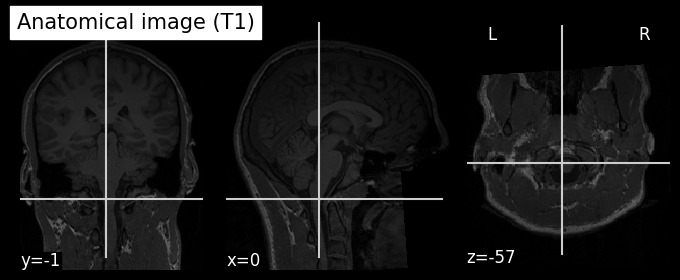

In [2]:
# Simple plot
plotting.plot_anat(anat_img, title='Anatomical image (T1)')
plotting.show()

### Cutting from different slices

We can specify specific coordinates.

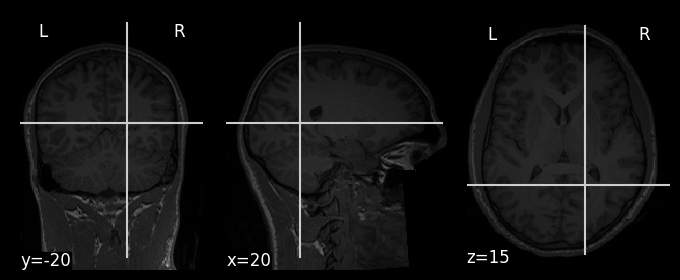

In [3]:
# x,y,z <--> sagittal, coronal, axial 
plotting.plot_anat(anat_img, cut_coords=(20, -20, 15))
plotting.show()

We can plot on only one plane. As an example, I plot in sagittal plane in the figure below. This time, *cut_coords* arguement brings us as many slices as desired.

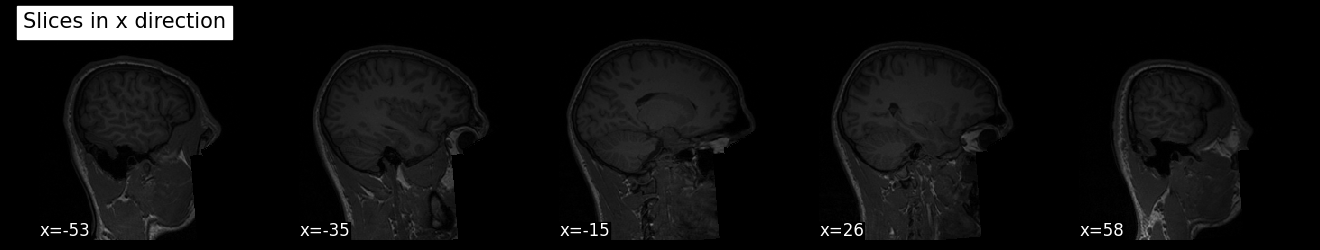

In [4]:
# Displaying x slices
plotting.plot_anat(anat_img, display_mode='x', cut_coords=5, title='Slices in x direction')
plotting.show()

Using the *display_mode* again, we can also choose 2 planes and specify coordinates.

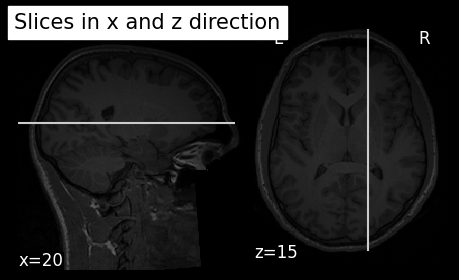

In [5]:
# Displaying x and z slices
plotting.plot_anat(anat_img, display_mode='xz', cut_coords=(20, 15), title='Slices in x and z direction')
plotting.show()

Mosaic plot can be a great way to see many slices side-by-side.

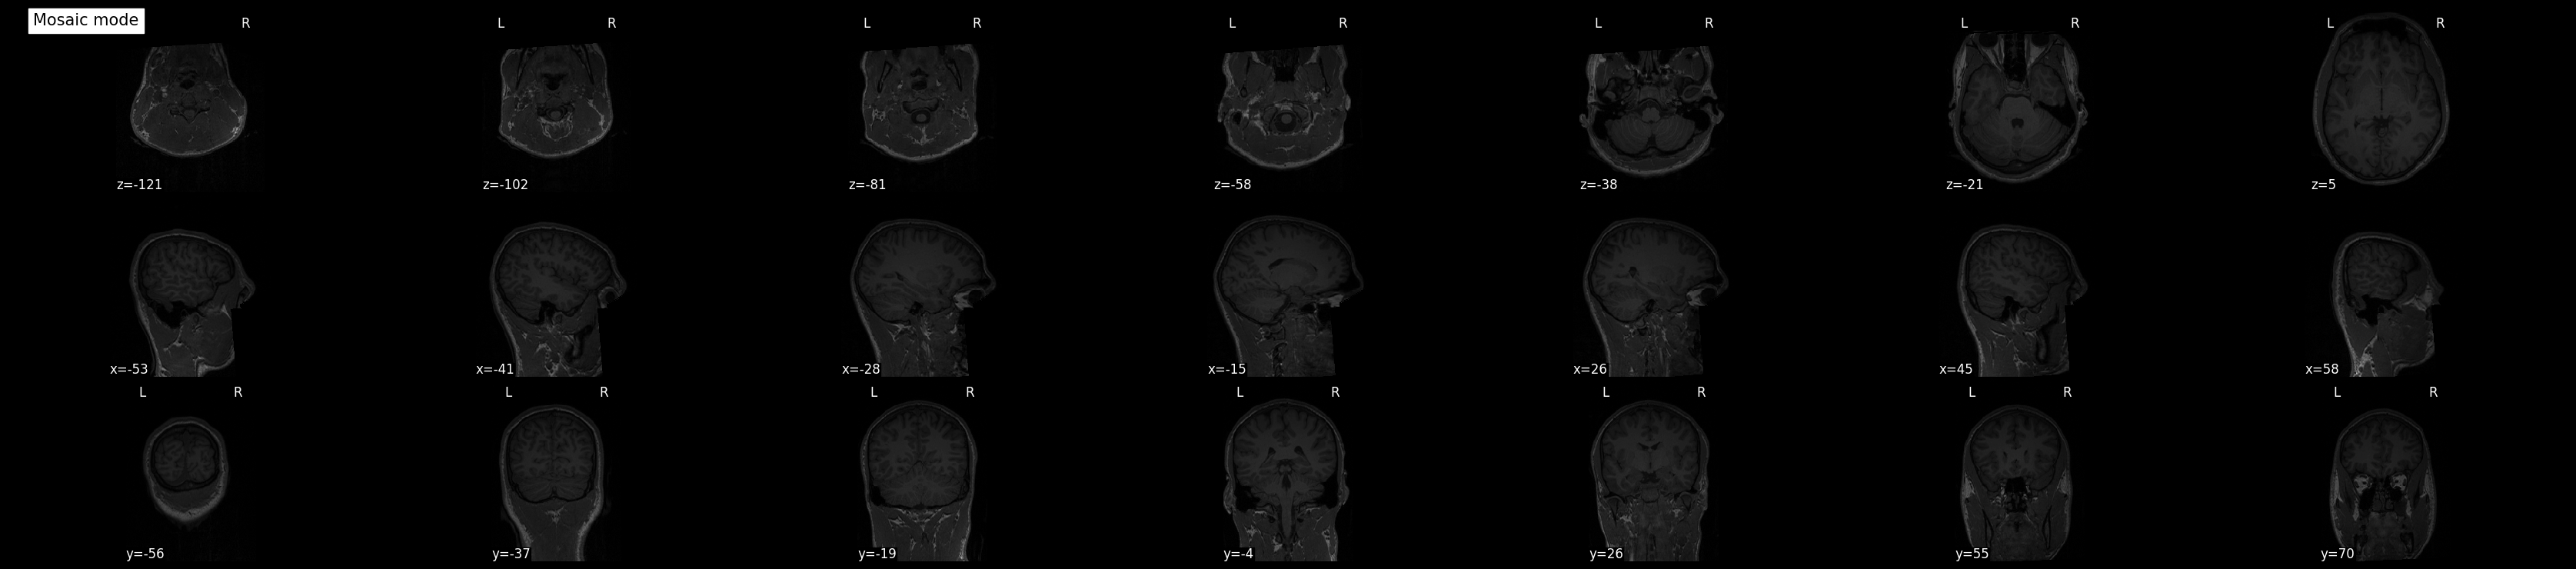

In [6]:
# Mosaic display mode
plotting.plot_anat(anat_img, display_mode='mosaic', title='Mosaic mode')
plotting.show()

#### Options for *display_mode*

Valid options for *display_mode* arguement are ['mosaic', 'ortho', 'tiled', 'x', 'xz', 'y', 'yx', 'yz', 'z'].

### Removing crosshair

We can remove the crosshair from the plots by using the *draw_cross* arguement.

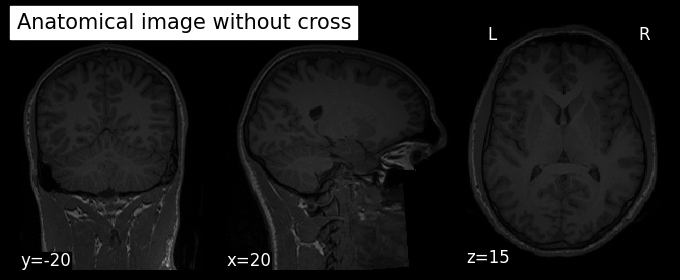

In [7]:
# Removing crosshair 
plotting.plot_anat(anat_img, cut_coords=(20, -20, 15), draw_cross=False, title='Anatomical image without cross')
plotting.show()

## Functional Dataset

In [8]:
# Importing image index utilities from Nilearn
from nilearn.image import index_img

# Dataset
func_img = 'example_data/func.nii.gz'

### Simple Plot

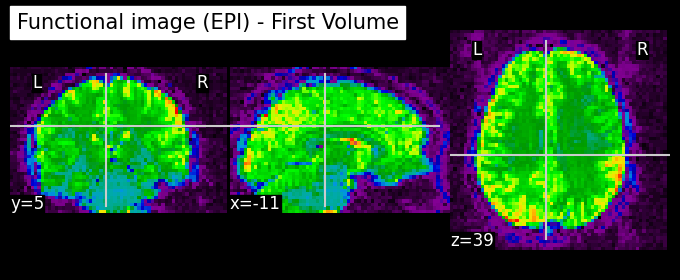

In [9]:
# Selecting a single volume from the 4D file
volume = index_img(func_img, 0)

# Plotting the first volume of the functional image
plotting.plot_epi(volume, title='Functional image (EPI) - First Volume')
plotting.show()

### Cutting from Different Slices

Changing *display_mode* to *'x'* to show slices in x direction.

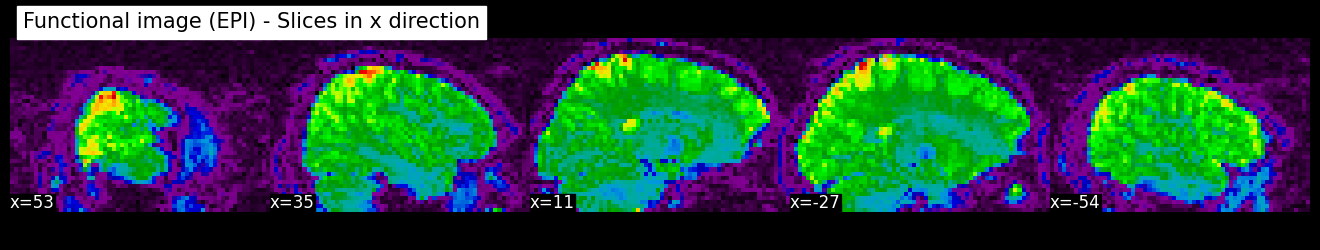

In [10]:
plotting.plot_epi(volume, display_mode='x', cut_coords=5, title='Functional image (EPI) - Slices in x direction')
plotting.show()

We can also again use the *cut_coords* arguement to select a desired slice.

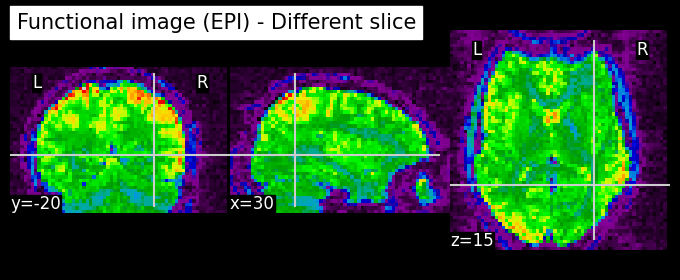

In [11]:
# Changing cut_coords to select different slice
plotting.plot_epi(volume, cut_coords=(30, -20, 15), title='Functional image (EPI) - Different slice')
plotting.show()

Or we can use mosaic to see different slices side-by-side.

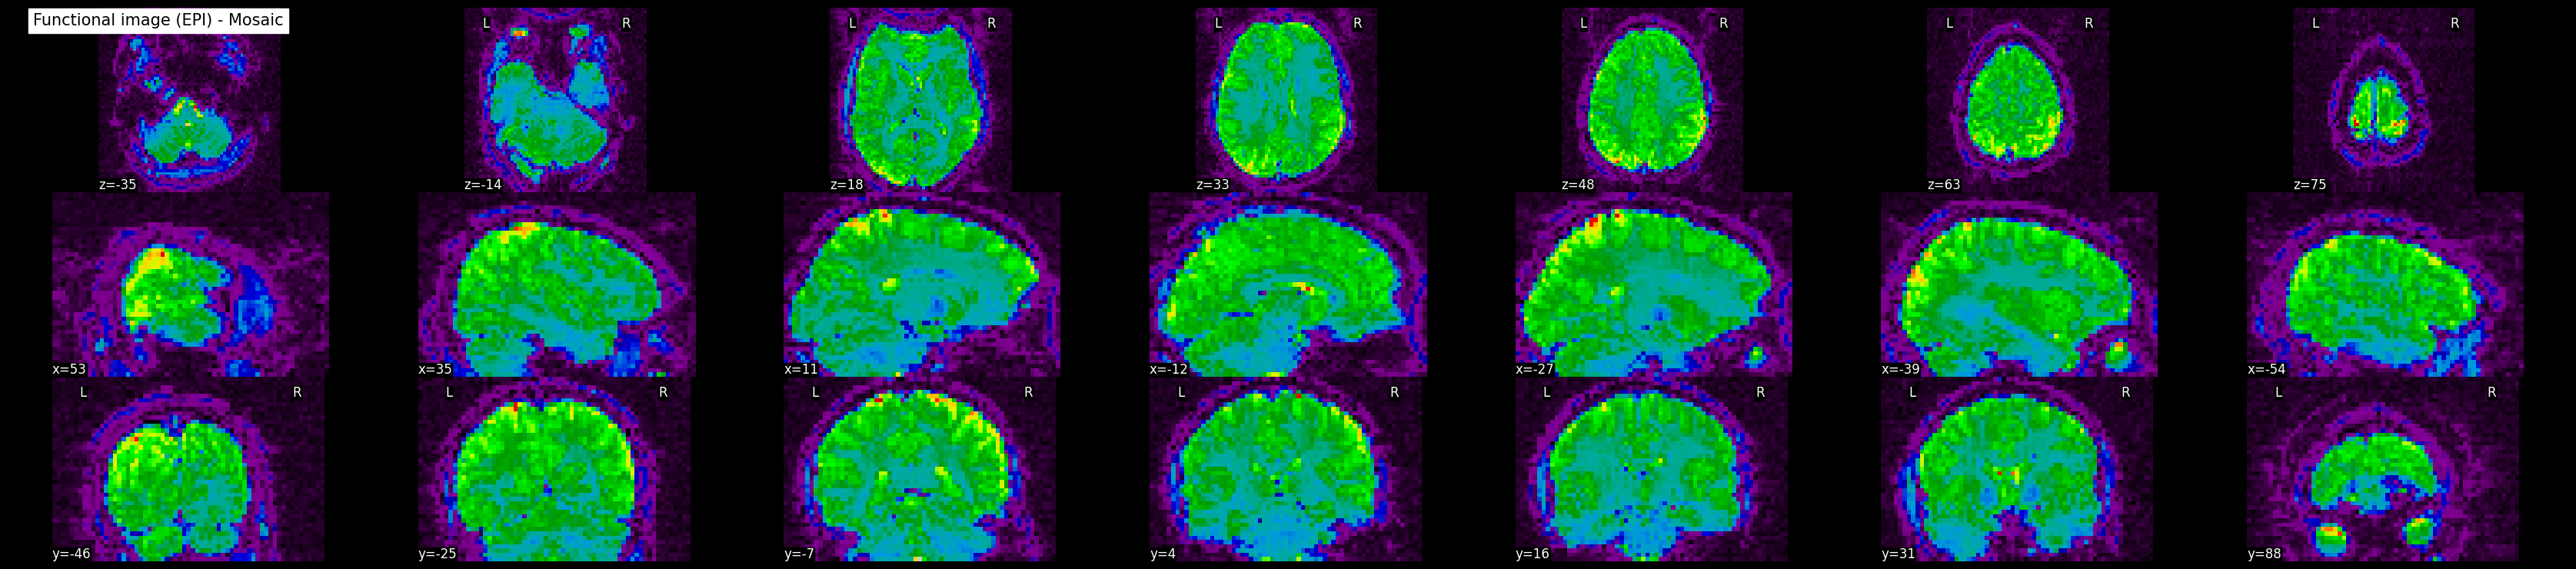

In [12]:
plotting.plot_epi(volume, display_mode='mosaic', title='Functional image (EPI) - Mosaic')
plotting.show()

### Changing the Color Map

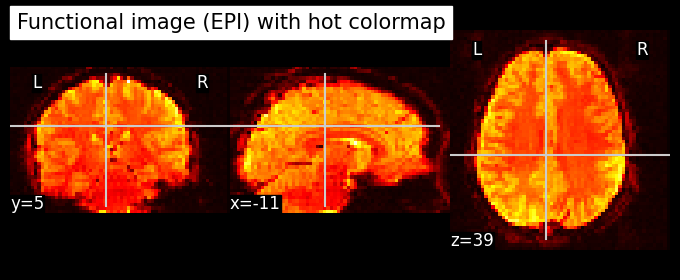

In [13]:
# Changing color map (cmap) to 'hot'
plotting.plot_epi(volume, cmap='hot', title='Functional image (EPI) with hot colormap')
plotting.show()

### Remove Crosshair

Cross can be removed just as before.

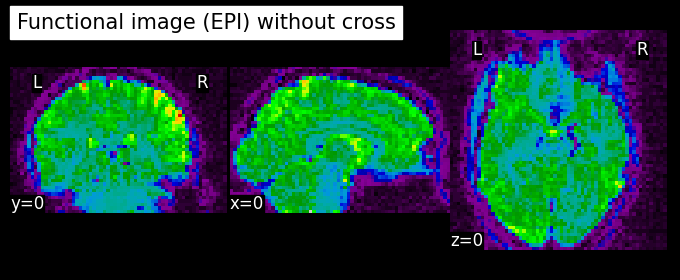

In [14]:
# Removing crosshair
plotting.plot_epi(volume, cut_coords=(0, 0, 0), draw_cross=False, title='Functional image (EPI) without cross')
plotting.show()

### Plotting the mean image

We can calculate the mean image first then plot it using *plot_epi* method.

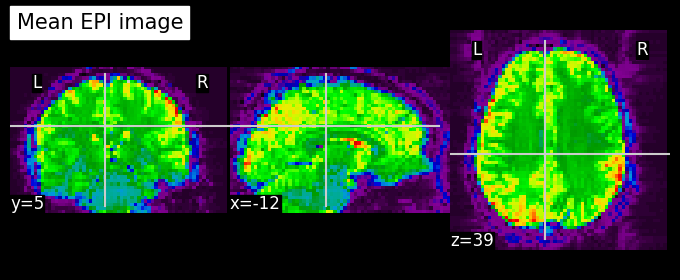

In [15]:
import nilearn.image as image

# Compute mean image
mean_img = image.mean_img(func_img)
# Plot mean image
plotting.plot_epi(mean_img, title='Mean EPI image')

### Activating colorbar

We can activate the colorbar with the *colorbar* boolean arguement.

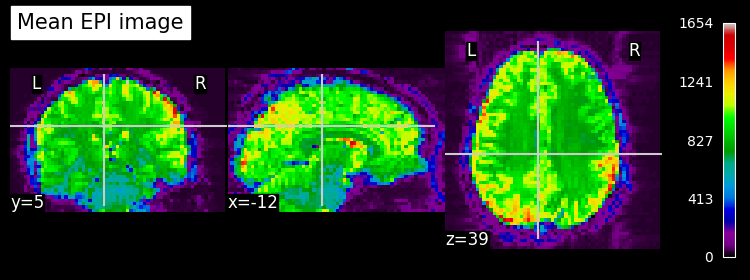

In [16]:
plotting.plot_epi(mean_img, title='Mean EPI image', colorbar=True, cbar_tick_format="%i")

## Plotting Functional Dataset on top of Anatomical

We can use anatomical dataset as the background image for the functional dataset.

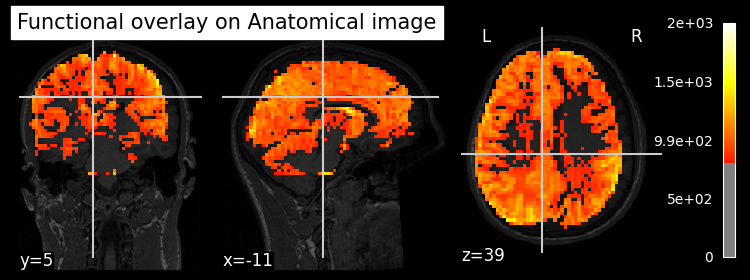

In [17]:
# Overlaying the functional image on the anatomical image
plotting.plot_stat_map(volume, bg_img=anat_img, threshold='auto', 
                       title='Functional overlay on Anatomical image')
plotting.show()

## Computing EPI mask

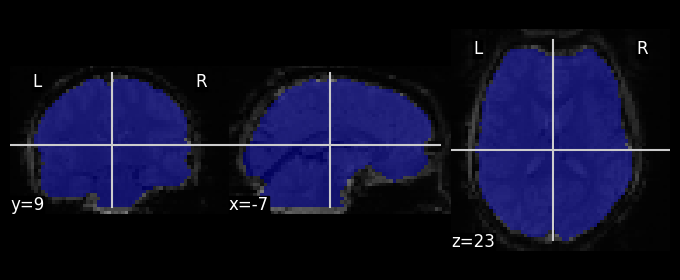

In [18]:
from nilearn.masking import compute_epi_mask

mask_img = compute_epi_mask(func_img)

plotting.plot_roi(mask_img, mean_img)

We can use NiftiMasker to create the mask and get a report for it.

In [19]:
from nilearn.maskers import NiftiMasker

masker = NiftiMasker(mask_strategy='epi')
masker.fit(func_img)

report = masker.generate_report()
report

Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,None
mask_strategy,epi
memory,Memory(location=None)
memory_level,1


A mask can also be computed from the MNI template. In this case, it is resampled to the target image. Three options are available: ‘whole-brain-template’, ‘gm-template’, and ‘wm-template’ depending on whether the whole-brain, gray matter, or white matter template should be used. For example, use *mask_strategy='whole-brain-template'* arguement to mask with MNI template from whole brain image.